In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import csv

# Reading the species file (GBIF annotated archive)

In [61]:
df_species = pd.read_csv(r'ebutterfly/Species/0177442-230224095556074.csv', 
                  sep="	|	",
                  engine="python")

In [62]:
df_species.keys()

Index(['taxonKey', 'scientificName', 'acceptedTaxonKey',
       'acceptedScientificName', 'numberOfOccurrences', 'taxonRank',
       'taxonomicStatus', 'kingdom', 'kingdomKey', 'phylum', 'phylumKey',
       'class', 'classKey', 'order', 'orderKey', 'family', 'familyKey',
       'genus', 'genusKey', 'species', 'speciesKey', 'iucnRedListCategory'],
      dtype='object')

In [4]:
df_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,1909436,"Hypocysta irius Fabricius, 1775",1909436,"Hypocysta irius Fabricius, 1775",1,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Hypocysta,1909428.0,Hypocysta irius,1909436.0,NE
1,1918309,"Lethe Hübner, 1819",1918309,"Lethe Hübner, 1819",55,GENUS,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Lethe,1918309.0,None,NaN,None
2,1937642,"Papilio eurymedon Lucas, 1852",1937642,"Papilio eurymedon Lucas, 1852",642,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Papilionidae,9417.0,Papilio,10175914.0,Papilio eurymedon,1937642.0,NE
3,4300485,"Chlorostrymon maesites (Herrich-Schäffer, 1864)",1930581,"Thecla maesites Herrich-Schäffer, 1864",1,SPECIES,SYNONYM,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Lycaenidae,5473.0,Thecla,1929768.0,Thecla maesites,1930581.0,NE
4,5714356,Polygonia satyrus Edwards,5714356,Polygonia satyrus Edwards,942,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Polygonia,1898474.0,Polygonia satyrus,5714356.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1911178,"Coenonympha haydeni Edwards, 1872",1911178,"Coenonympha haydeni Edwards, 1872",11,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Coenonympha,1911078.0,Coenonympha haydeni,1911178.0,NE
1667,1914511,"Chlosyne hippodrome (Geyer, 1837)",1914511,"Chlosyne hippodrome (Geyer, 1837)",1,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Chlosyne,1914398.0,Chlosyne hippodrome,1914511.0,NE
1668,5128279,"Oeneis polixenes Fabricius, 1775",9804158,"Oeneis bore Esper, 1790",91,SPECIES,SYNONYM,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Nymphalidae,7017.0,Oeneis,1895260.0,Oeneis bore,9804158.0,NE
1669,5137558,"Enantia albania (Bates, 1864)",5137558,"Enantia albania (Bates, 1864)",1,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216.0,Lepidoptera,797.0,Pieridae,5481.0,Enantia,1919675.0,Enantia albania,5137558.0,NE


In [6]:
df_species.iloc[0]

taxonKey                                          1909436
scientificName            Hypocysta irius Fabricius, 1775
acceptedTaxonKey                                  1909436
acceptedScientificName    Hypocysta irius Fabricius, 1775
numberOfOccurrences                                     1
taxonRank                                         SPECIES
taxonomicStatus                                  ACCEPTED
kingdom                                          Animalia
kingdomKey                                              1
phylum                                         Arthropoda
phylumKey                                            54.0
class                                             Insecta
classKey                                            216.0
order                                         Lepidoptera
orderKey                                            797.0
family                                        Nymphalidae
familyKey                                          7017.0
genus         

In [7]:
df_species['numberOfOccurrences'].max()

28113

In [8]:
df_species['numberOfOccurrences'].min()

1

In [9]:
df_species['numberOfOccurrences'].mean()

297.08438061041295

In [10]:
temp = df.iloc[df.index[df['numberOfOccurrences'] > 100]]

# Reading the simple file  (GBIF annotated archive)
which includes occurances, each with their unique ID, location (lat, long), species, country, date

In [18]:
df_obs = pd.read_csv(r'ebutterfly/Simple/0177310-230224095556074.csv', 
                  sep="	|	",
                  engine="python")

In [19]:
df_obs.keys()

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [20]:
df_obs

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3922908706,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-489640,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Coenonympha,Coenonympha tullia,...,eButterfly users,2022-07-21T00:00:00,CC_BY_NC_4_0,NaN,mikeperrin,NaN,NaN,2023-04-17T09:12:34.522Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
1,3397354285,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-20488,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Polygonia,Polygonia faunus,...,eButterfly users,2012-08-22T00:00:00,CC_BY_NC_4_0,NaN,Jim54,NaN,NaN,2023-04-17T09:09:57.365Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
2,3922908709,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-489659,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Limenitis,Limenitis archippus,...,eButterfly users,2022-07-21T00:00:00,CC_BY_NC_4_0,NaN,StevenFurino,NaN,NaN,2023-04-17T09:12:34.523Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
3,3397354286,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-20514,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Vanessa,Vanessa virginiensis,...,eButterfly users,2012-09-14T00:00:00,CC_BY_NC_4_0,NaN,Jacy,NaN,NaN,2023-04-17T09:09:57.366Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
4,3922904702,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-489677,Animalia,Arthropoda,Insecta,Lepidoptera,Pieridae,Colias,Colias alexandra,...,eButterfly users,2022-07-21T00:00:00,CC_BY_NC_4_0,NaN,prappas,NaN,NaN,2023-04-17T09:12:34.524Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496423,3397369417,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-44784,Animalia,Arthropoda,Insecta,Lepidoptera,Lycaenidae,Harkenclenus,Harkenclenus titus,...,eButterfly users,2013-07-18T00:00:00,CC_BY_NC_4_0,NaN,rcav,NaN,NaN,2023-04-17T09:10:05.505Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
496424,3397369418,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-44810,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Speyeria,Speyeria aphrodite,...,eButterfly users,2014-05-16T09:04:41,CC_BY_NC_4_0,NaN,doghouse,NaN,NaN,2023-04-17T09:10:05.506Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
496425,3427427343,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-44829,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Phyciodes,Phyciodes tharos,...,eButterfly users,2013-07-18T00:00:00,CC_BY_NC_4_0,NaN,roypilcher,NaN,NaN,2023-04-17T09:10:05.506Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
496426,3397369419,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-44847,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Nymphalis,Nymphalis antiopa,...,eButterfly users,2013-07-18T00:00:00,CC_BY_NC_4_0,NaN,Sonya,NaN,NaN,2023-04-17T09:10:05.507Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...


In [21]:
df_obs['countryCode'].value_counts()

CA    246575
US    245288
PA      1262
MX      1250
CR       572
CU       435
DO       117
JM       106
BS        89
FR        87
BZ        82
AU        70
EC        55
KR        50
GB        43
PE        38
ZA        32
PR        32
IT        29
BR        27
TT        25
CO        24
MS        18
KY        16
HN        15
CN        13
TH         9
VN         9
PL         9
KE         9
NZ         8
CW         7
LC         5
FJ         4
AR         3
GT         3
ES         3
PT         3
PY         2
KN         2
SV         1
GY         1
Name: countryCode, dtype: int64

In [13]:
df_obs.iloc[df_obs.index[df_obs['taxonKey']  == 1918309]]

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
25430,3427442855,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-238299,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2016-07-11T00:00:00,CC_BY_NC_4_0,NaN,juliereid,NaN,NaN,2023-04-17T09:11:26.125Z,StillImage;StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
46762,3427489245,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-458817,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2021-07-09T00:00:00,CC_BY_NC_4_0,NaN,kevins,NaN,NaN,2023-04-17T09:12:28.302Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
49556,3922903384,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-487068,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2022-07-07T00:00:00,CC_BY_NC_4_0,NaN,kanderson,NaN,NaN,2023-04-17T09:12:34.286Z,StillImage;StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
58615,3397537350,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-112920,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2014-10-15T09:53:06,CC_BY_NC_4_0,NaN,ldbogan,NaN,NaN,2023-04-17T09:12:51.150Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
63317,3397557463,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-161980,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2015-08-26T07:25:51,CC_BY_NC_4_0,NaN,donhenise,NaN,NaN,2023-04-17T09:12:55.150Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
83477,3397644572,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-371446,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2019-07-25T16:36:42,CC_BY_NC_4_0,NaN,kanderson,NaN,NaN,2023-04-17T09:13:11.729Z,StillImage;StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
88383,3427532388,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-422449,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2020-07-25T00:00:00,CC_BY_NC_4_0,NaN,billie,NaN,NaN,2023-04-17T09:13:16.660Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
119394,3427529005,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-413821,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2020-07-03T00:00:00,CC_BY_NC_4_0,NaN,twowagenmakers,NaN,NaN,2023-04-17T09:13:16.638Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
121428,3427543039,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-455339,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2021-06-28T00:00:00,CC_BY_NC_4_0,NaN,tarmat,NaN,NaN,2023-04-17T09:13:21.376Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
121632,3427543243,cf3bdc30-370c-48d3-8fff-b587a39d72d6,eb-observation-459533,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Lethe,NaN,...,eButterfly users,2021-07-09T00:00:00,CC_BY_NC_4_0,NaN,WombatBoy,NaN,NaN,2023-04-17T09:13:21.591Z,StillImage,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...


In [16]:
df_obs.iloc[100]

gbifID                                                                     3922908819
datasetKey                                       cf3bdc30-370c-48d3-8fff-b587a39d72d6
occurrenceID                                                    eb-observation-490594
kingdom                                                                      Animalia
phylum                                                                     Arthropoda
class                                                                         Insecta
order                                                                     Lepidoptera
family                                                                     Lycaenidae
genus                                                                    Glaucopsyche
species                                                         Glaucopsyche lygdamus
infraspecificEpithet                                                              NaN
taxonRank                                             

In [18]:
df_obs.groupby(["decimalLatitude", "decimalLongitude"]).size()

decimalLatitude  decimalLongitude
-45.466239        168.683667          1
-43.778600        170.123851          1
-42.813003        173.273945          1
-42.399448        173.679911          2
-36.828136        174.426132          3
                                     ..
 73.080000       -80.000000           1
 73.149579       -79.965232           1
 73.154420       -79.984932          39
 73.157007       -79.970169           1
 75.000000       -45.000000           1
Length: 44646, dtype: int64

In [20]:
df_obs['decimalLatitude'].unique().shape

(44231,)

In [21]:
df_obs['decimalLongitude'].unique().shape

(44270,)

In [22]:
df_obs.index[df2['year'] > 2000]

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            496418, 496419, 496420, 496421, 496422, 496423, 496424, 496425,
            496426, 496427],
           dtype='int64', length=474775)

In [23]:
df_temp = df_obs.iloc[df_obs.index[(df_obs['year'] > 2000) & (df_obs['year'] < 2022)]]

In [24]:
df_temp.shape

(444142, 50)

<AxesSubplot:>

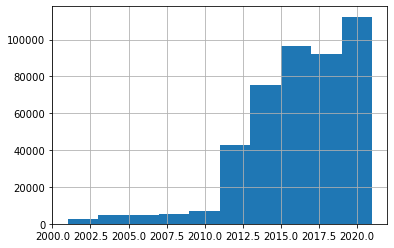

In [25]:
df_temp['year'].hist()

In [26]:
df_temp['month'].value_counts()

7     113486
6      87050
8      78885
5      46604
9      46249
10     22384
4      20712
11     11756
3       9133
12      3172
2       2936
1       1775
Name: month, dtype: int64

In [27]:
df_temp.loc[df_temp.index[(df_temp['month'] == 6)]]['countryCode'].value_counts()

CA    54615
US    32379
FR       16
EC       13
BZ       13
CU        7
GB        4
IT        3
Name: countryCode, dtype: int64

In [28]:
final_df = df_temp.loc[df_temp.index[(df_temp['month'] == 6) & (df_temp['countryCode'] == "US")]]

In [29]:
final_df['species']

589            Thorybes pylades
603             Speyeria idalia
607                Pieris rapae
611         Glaucopsyche piasus
683             Thorybes daunus
                  ...          
496322    Glaucopsyche lygdamus
496345         Celastrina ladon
496346        Elkalyce comyntas
496411          Battus philenor
496412     Vanessa virginiensis
Name: species, Length: 32379, dtype: object

In [30]:
final_df['species'].value_counts()

Phyciodes tharos       1349
Pieris rapae           1294
Euptychia cymela        965
Coenonympha tullia      909
Epargyreus clarus       878
                       ... 
Papilio astyalus          1
Heliconius erato          1
Cymaenes tripunctus       1
Lerodea arabus            1
Myscelia cyananthe        1
Name: species, Length: 453, dtype: int64

In [31]:
final_df.groupby(["decimalLatitude", "decimalLongitude"]).size()

decimalLatitude  decimalLongitude
24.659498        -81.274323           1
24.824716        -80.812511           9
24.878261        -80.677071           6
25.175939        -80.369633          14
25.176264        -80.369494           2
                                     ..
64.997359        -164.718018          1
65.286687        -164.797983          2
66.867612        -162.539112          1
67.500012        -156.833916          1
69.095382        -145.994812         11
Length: 3291, dtype: int64

In [122]:
final_df['kingdom'].value_counts()

Animalia    32379
Name: kingdom, dtype: int64

In [123]:
final_df['phylum'].value_counts()

Arthropoda    32323
Name: phylum, dtype: int64

In [124]:
final_df['class'].value_counts()

Insecta    32323
Name: class, dtype: int64

In [125]:
final_df['order'].value_counts()

Lepidoptera    32323
Name: order, dtype: int64

In [127]:
final_df['family'].value_counts()

Nymphalidae     12388
Hesperiidae      7471
Lycaenidae       4238
Pieridae         4006
Papilionidae     3939
Riodinidae         25
Name: family, dtype: int64

In [128]:
final_df['genus'].value_counts()

Papilio         3533
Phyciodes       1565
Pieris          1411
Limenitis       1401
Vanessa         1341
                ... 
Emesis             1
Glutophrissa       1
Eryphanis          1
Polygonus          1
Eunica             1
Name: genus, Length: 169, dtype: int64

# Reading the occurances.txt file (GBIF annotated archive)

In [14]:
# this file needs more memory than what I have 
df_all_occurances = pd.read_csv(r'ebutterfly/Darwin/0177350-230224095556074/all_occ.csv', 
                  sep="	|	",
                  engine="python")

In [24]:
df_all_occurances

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,eventType
0,3922908706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.22_1,Massachusetts,USA.22.12_1,Plymouth,NaN,NaN,NE,NaN
1,3397354285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CAN,Canada,CAN.4_1,New Brunswick,CAN.4.14_1,Westmorland,CAN.4.14.9_1,Moncton,NE,NaN
2,3922908709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CAN,Canada,CAN.9_1,Ontario,CAN.9.18_1,Huron,CAN.9.18.4_1,Goderich,LC,NaN
3,3397354286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CAN,Canada,CAN.9_1,Ontario,CAN.9.9_1,Essex,CAN.9.9.6_1,Leamington,LC,NaN
4,3922904702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.6_1,Colorado,USA.6.58_1,San Miguel,NaN,NaN,NE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496423,3397369417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CAN,Canada,CAN.9_1,Ontario,CAN.9.35_1,Ottawa,CAN.9.35.1_1,Ottawa,NE,NaN
496424,3397369418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.20_1,Maine,USA.20.16_1,York,NaN,NaN,NE,NaN
496425,3427427343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.46_1,Vermont,USA.46.11_1,Rutland,NaN,NaN,NE,NaN
496426,3397369419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CAN,Canada,CAN.11_1,Québec,CAN.11.68_1,Les Maskoutains,CAN.11.68.9_1,Saint-Hyacinthe,LC,NaN


In [26]:
df_occurances.columns

Index(['gbifID', 'abstract', 'accessRights', 'accrualMethod',
       'accrualPeriodicity', 'accrualPolicy', 'alternative', 'audience',
       'available', 'bibliographicCitation',
       ...
       'level0Gid', 'level0Name', 'level1Gid', 'level1Name', 'level2Gid',
       'level2Name', 'level3Gid', 'level3Name', 'iucnRedListCategory',
       'eventType'],
      dtype='object', length=259)

In [17]:
df_all_occurances['eventID'].value_counts()

eb-checklist-63464    90
eb-checklist-54058    85
eb-checklist-132      72
eb-checklist-58259    71
eb-checklist-41071    70
                      ..
eb-checklist-17409     1
eb-checklist-17429     1
eb-checklist-17588     1
eb-checklist-17602     1
eb-checklist-14494     1
Name: eventID, Length: 117550, dtype: int64

In [29]:
df_all_occurances['countryCode'].value_counts()

CA    246575
US    245288
PA      1262
MX      1250
CR       572
CU       435
DO       117
JM       106
BS        89
FR        87
BZ        82
AU        70
EC        55
KR        50
GB        43
PE        38
ZA        32
PR        32
IT        29
BR        27
TT        25
CO        24
MS        18
KY        16
HN        15
CN        13
TH         9
VN         9
PL         9
KE         9
NZ         8
CW         7
LC         5
FJ         4
AR         3
GT         3
ES         3
PT         3
PY         2
KN         2
SV         1
GY         1
Name: countryCode, dtype: int64

'verbatimLocality' ->location
'occurrenceID' -> eb-observation
'eventID' -> eb-checklist
'locationID' -> eb-site
'species'
'decimalLatitude'
'decimalLongitude'
'taxonID' -> eb-species

In [8]:
df_occurances = pd.read_csv(r'ebutterfly/Darwin/0177350-230224095556074/partial_occ.csv', 
                  sep="	|	",
                  engine="python")

In [27]:
df_occurances.keys()[0:100]

Index(['gbifID', 'abstract', 'accessRights', 'accrualMethod',
       'accrualPeriodicity', 'accrualPolicy', 'alternative', 'audience',
       'available', 'bibliographicCitation', 'conformsTo', 'contributor',
       'coverage', 'created', 'creator', 'date', 'dateAccepted',
       'dateCopyrighted', 'dateSubmitted', 'description', 'educationLevel',
       'extent', 'format', 'hasFormat', 'hasPart', 'hasVersion', 'identifier',
       'instructionalMethod', 'isFormatOf', 'isPartOf', 'isReferencedBy',
       'isReplacedBy', 'isRequiredBy', 'isVersionOf', 'issued', 'language',
       'license', 'mediator', 'medium', 'modified', 'provenance', 'publisher',
       'references', 'relation', 'replaces', 'requires', 'rights',
       'rightsHolder', 'source', 'spatial', 'subject', 'tableOfContents',
       'temporal', 'title', 'type', 'valid', 'institutionID', 'collectionID',
       'datasetID', 'institutionCode', 'collectionCode', 'datasetName',
       'ownerInstitutionCode', 'basisOfRecord', 'in

In [10]:
df_occurances.keys()[100:200]

Index(['parentEventID', 'fieldNumber', 'eventDate', 'eventTime',
       'startDayOfYear', 'endDayOfYear', 'year', 'month', 'day',
       'verbatimEventDate', 'habitat', 'samplingProtocol', 'sampleSizeValue',
       'sampleSizeUnit', 'samplingEffort', 'fieldNotes', 'eventRemarks',
       'locationID', 'higherGeographyID', 'higherGeography', 'continent',
       'waterBody', 'islandGroup', 'island', 'countryCode', 'stateProvince',
       'county', 'municipality', 'locality', 'verbatimLocality',
       'verbatimElevation', 'verticalDatum', 'verbatimDepth',
       'minimumDistanceAboveSurfaceInMeters',
       'maximumDistanceAboveSurfaceInMeters', 'locationAccordingTo',
       'locationRemarks', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision',
       'pointRadiusSpatialFit', 'verbatimCoordinateSystem', 'verbatimSRS',
       'footprintWKT', 'footprintSRS', 'footprintSpatialFit',
       'georeferencedBy', 'georeferencedDate', 'georeferenceP

In [11]:
df_occurances.keys()[200:]

Index(['family', 'subfamily', 'genus', 'genericName', 'subgenus',
       'infragenericEpithet', 'specificEpithet', 'infraspecificEpithet',
       'cultivarEpithet', 'taxonRank', 'verbatimTaxonRank', 'vernacularName',
       'nomenclaturalCode', 'taxonomicStatus', 'nomenclaturalStatus',
       'taxonRemarks', 'datasetKey', 'publishingCountry', 'lastInterpreted',
       'elevation', 'elevationAccuracy', 'depth', 'depthAccuracy',
       'distanceAboveSurface', 'distanceAboveSurfaceAccuracy',
       'distanceFromCentroidInMeters', 'issue', 'mediaType', 'hasCoordinate',
       'hasGeospatialIssues', 'taxonKey', 'acceptedTaxonKey', 'kingdomKey',
       'phylumKey', 'classKey', 'orderKey', 'familyKey', 'genusKey',
       'subgenusKey', 'speciesKey', 'species', 'acceptedScientificName',
       'verbatimScientificName', 'typifiedName', 'protocol', 'lastParsed',
       'lastCrawled', 'repatriated', 'relativeOrganismQuantity', 'level0Gid',
       'level0Name', 'level1Gid', 'level1Name', 'level2Gi

In [13]:
df_occurances['eventID'].value_counts()

eb-checklist-118151    2
eb-checklist-6350      2
eb-checklist-118195    2
eb-checklist-118085    2
eb-checklist-118180    2
                      ..
eb-checklist-6150      1
eb-checklist-118094    1
eb-checklist-6148      1
eb-checklist-118093    1
eb-checklist-118234    1
Name: eventID, Length: 95, dtype: int64

In [9]:
df_occurances.iloc[0].values.tolist()

[3922908706,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'eb-observation-489640',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'CC_BY_NC_4_0',
 nan,
 nan,
 '2022-07-22T05:02:45.843Z',
 nan,
 'Vermont Center for Ecostudies',
 'https://www.e-butterfly.org/ebapp/en/checklists/view/118054',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'eButterfly',
 'eButterfly',
 'HUMAN_OBSERVATION',
 nan,
 nan,
 '"{""countAdult"" : null, ""countAdultMale"" : null, ""countAdultFemale"" : null, ""countEgg"" : null, ""countCaterpillar"" : null, ""countChrysalis"" : null, ""created"" : ""2022-07-21T21:33:33.488813""}"',
 'eb-observation-489640',
 'eb-observation-489640',
 'eb-observation-489640',
 'mikeperrin',
 nan,
 6,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'PRESENT',
 nan,
 nan,
 nan,
 'https://www.e-butte

# Reading the occurances.txt file (Source archive)
mapping observations to a checklist

In [3]:
df_checklists = pd.read_csv(r'ebutterfly/Soure_archive/dwca-ebutterfly-v1.409/occurrence_.csv', sep='\t', engine="python")

In [4]:
df_checklists.keys()

Index(['id', 'modified', 'license', 'datasetName', 'ownerInstitutionCode',
       'basisOfRecord', 'informationWithheld', 'dataGeneralizations',
       'dynamicProperties', 'occurrenceID', 'catalogNumber', 'recordNumber',
       'recordedBy', 'individualCount', 'preparations', 'associatedMedia',
       'associatedReferences', 'occurrenceRemarks', 'eventID', 'identifiedBy',
       'dateIdentified', 'identificationVerificationStatus',
       'identificationRemarks', 'taxonID', 'scientificName', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet',
       'infraspecificEpithet', 'taxonRank', 'scientificNameAuthorship',
       'vernacularName'],
      dtype='object')

In [5]:
df_checklists

,id,modified,license,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,...,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,scientificNameAuthorship,vernacularName
0,eb-checklist-119,2020-04-26 16:21:56,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : 100, ""countAdultMale"" : null, ...",eb-observation-55,...,Arthropoda,Insecta,Lepidoptera,Lycaenidae,Plebejus,saepiolus,NaN,SPECIES,"(Boisduval, 1852)",Greenish Blue
1,eb-checklist-125,2020-04-26 16:21:58,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : 2, ""countAdultMale"" : null, ""c...",eb-observation-114,...,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Coenonympha,tullia,NaN,SPECIES,"(Edwards, 1861)",Common Ringlet
2,eb-checklist-133,2020-04-26 16:22:01,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : 2, ""countAdultMale"" : null, ""c...",eb-observation-155,...,Arthropoda,Insecta,Lepidoptera,Pieridae,Pieris,rapae,NaN,SPECIES,"(Linnaeus, 1758)",Cabbage White
3,eb-checklist-134,2020-04-26 16:22:02,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : 1, ""countAdultMale"" : null, ""c...",eb-observation-176,...,Arthropoda,Insecta,Lepidoptera,Pieridae,Pieris,marginalis,NaN,SPECIES,"Scudder, 1861",Margined White
4,eb-checklist-139,2022-07-12 19:25:30.117546,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : 6, ""countAdultMale"" : null, ""c...",eb-observation-244,...,Arthropoda,Insecta,Lepidoptera,Lycaenidae,Cupido,amyntula,NaN,SPECIES,"(Boisduval, 1852)",Western Tailed-Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421191,eb-checklist-94952,2020-01-15 09:08:55,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : null, ""countAdultMale"" : null,...",eb-observation-385796,...,Arthropoda,Insecta,Lepidoptera,Pieridae,Pieris,rapae,NaN,SPECIES,"(Linnaeus, 1758)",Cabbage White
421192,eb-checklist-117493,2022-07-06 18:12:44.888665,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : null, ""countAdultMale"" : null,...",eb-observation-486343,...,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Phyciodes,cocyta,NaN,SPECIES,"(Cramer, 1777)",Northern Crescent
421193,eb-checklist-96872,2020-05-19 16:54:24,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : null, ""countAdultMale"" : null,...",eb-observation-394546,...,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Vanessa,atalanta,NaN,SPECIES,"(Linnaeus, 1758)",Red Admiral
421194,eb-checklist-104116,2020-08-23 15:35:43,https://creativecommons.org/licenses/by-nc/4.0/,eButterfly,eButterfly,HumanObservation,NaN,NaN,"{""countAdult"" : null, ""countAdultMale"" : null,...",eb-observation-429433,...,Arthropoda,Insecta,Lepidoptera,Pieridae,Phoebis,agarithe,NaN,SPECIES,"(Boisduval, 1836)",Large Orange Sulphur


In [6]:
df_checklists['eventID'].value_counts()

eb-checklist-63464     85
eb-checklist-54058     79
eb-checklist-58259     66
eb-checklist-54050     62
eb-checklist-114594    61
                       ..
eb-checklist-22113      1
eb-checklist-22138      1
eb-checklist-22361      1
eb-checklist-22381      1
eb-checklist-113485     1
Name: eventID, Length: 110023, dtype: int64

In [7]:
occ_ids = df_checklists.iloc[df_checklists.index[df['id'] == 'eb-checklist-123487']]['occurrenceID'].values.tolist()

NameError: name 'df' is not defined

In [47]:
eb_checklist_63464 = df_checklists.iloc[df_checklists.index[df_checklists['occurrenceID'].isin(occ_ids)]]

In [48]:
eb_checklist_63464["decimalLatitude"].value_counts()

Series([], Name: decimalLatitude, dtype: int64)

In [49]:
eb_checklist_63464["decimalLongitude"].value_counts()

Series([], Name: decimalLongitude, dtype: int64)

In [50]:
eb_checklist_63464['species']

Series([], Name: species, dtype: object)